In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from numpy import *
import camb
from camb import model, initialpower

**a)** Using CAMB compute the matter power spectrum at different redshift. Then, manually set the density of massive neutrinos to zero. Comment the differences and justify the results.

- **Matter Power Spectra** para un universo con $m_{\nu} = 0.06$

----- Cosmological Parameters -----
H0 = 67.5
ombh2 = 0.022
omch2 = 0.122
mnu = 0.06
omk = 0
tau = 0.06
As = 2e-09
ns = 0.965
Note: redshifts have been re-sorted (earliest first)


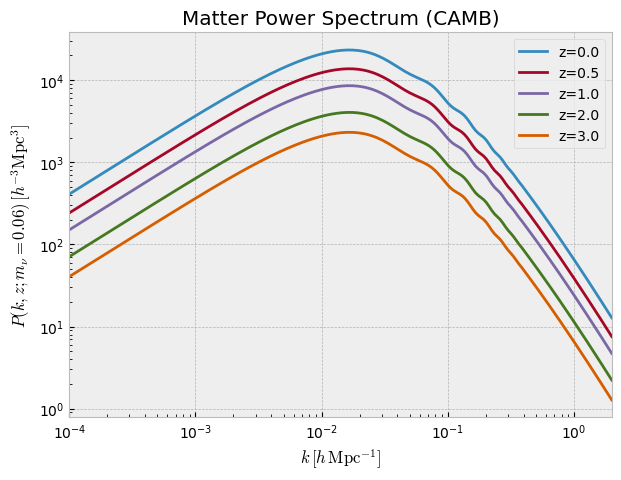

In [2]:
# Configuración de parámetros
# Parámetros actuales del universo
cosmo_params = {
    'H0': 67.5,        # Constante de Hubble [km/s/Mpc]
    'ombh2': 0.022,    # densidad de bariones
    'omch2': 0.122,    # densidad de CDM
    'mnu': 0.06,       # suma de masas de neutrinos [eV]
    'omk': 0,          # curvatura (universo plano)
    'tau': 0.06,       # reionización
    'As': 2e-9,        # comoving Curvature Power / fiducial amplitude guess
    'ns': 0.965        # índice espectral escalar
}

pars = camb.set_params(**cosmo_params)
print('----- Cosmological Parameters -----')
for key, val in cosmo_params.items():
    print(f'{key} = {val}')

# Primordial Power Spectrum
pars.InitPower.set_params()

# Matter Power Spectra
pars.set_matter_power(redshifts= [0., 0.5, 1., 2., 3.], # Redshifts
                      kmax=2.0 # Max Wave Number
                     )
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, # Min value of k/h
                                              maxkh=2,    # Max value of k/h
                                              npoints=200 # N° of points
                                             )

# kh : Wave Number Vector [h/Mpc]
# z  : Redshifts
# pk : P(k,z) matrix

plt.figure(figsize=(7,5))
for i, redshift in enumerate(z):
    plt.loglog(kh, pk[i], label=f'z={redshift}')
plt.xlim(kh[0], kh[-1])  

plt.title('Matter Power Spectrum (CAMB)')
plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
plt.ylabel(r'$P(k,z; m_{\nu}=0.06)\, [h^{-3}{\rm Mpc}^3]$')
plt.legend()
plt.grid(True)
plt.show()

- **Matter Power Spectra** para un universo con $m_{\nu} = 0$

In [3]:
#correción para mantener la densidad de materia
Om_nu_h2 = 0.06/93.14 # m_ν/93.14 eV  
omch2_corrected = 0.122 + Om_nu_h2

----- Cosmological Parameters -----
H0 = 67.5
ombh2 = 0.022
omch2 = 0.12264419153961778
mnu = 0.0
omk = 0
tau = 0.06
As = 2e-09
ns = 0.965
Note: redshifts have been re-sorted (earliest first)


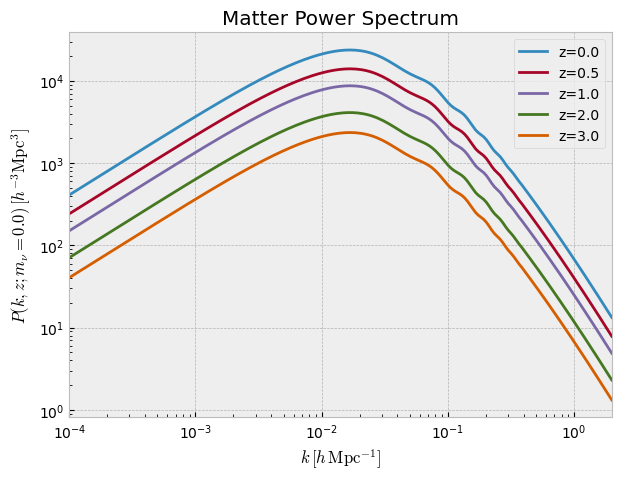

In [4]:
# Configuración de parámetros
# Parámetros actuales del universo
cosmo_params = {
    'H0': 67.5,              # Constante de Hubble [km/s/Mpc]
    'ombh2': 0.022,          # densidad de bariones
    'omch2': omch2_corrected,# densidad de CDM
    'mnu': 0.0,              # suma de masas de neutrinos [eV]
    'omk': 0,                # curvatura (universo plano)
    'tau': 0.06,             # reionización
    'As': 2e-9,              # comoving Curvature Power / fiducial amplitude guess
    'ns': 0.965              # índice espectral escalar
}

pars = camb.set_params(**cosmo_params)
print('----- Cosmological Parameters -----')
for key, val in cosmo_params.items():
    print(f'{key} = {val}')

# Primordial Power Spectrum
pars.InitPower.set_params()

# Matter Power Spectra
pars.set_matter_power(redshifts= [0., 0.5, 1., 2., 3.], # Redshifts
                      kmax=2.0 # Max Wave Number
                     )
results = camb.get_results(pars)
kh0, z, pk0 = results.get_matter_power_spectrum(minkh=1e-4,# Min value of k/h
                                              maxkh=2,    # Max value of k/h
                                              npoints=200 # N° of points
                                             )

# kh : Wave Number Vector [h/Mpc]
# z  : Redshifts
# pk : P(k,z) matrix

plt.figure(figsize=(7,5))
for i, redshift in enumerate(z):
    plt.loglog(kh, pk0[i], label=f'z={redshift}')
plt.xlim(kh[0], kh[-1])  

plt.title('Matter Power Spectrum')
plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
plt.ylabel(r'$P(k,z; m_{\nu}=0.0)\, [h^{-3}{\rm Mpc}^3]$')
plt.legend()
plt.grid(True)
plt.show()

- Comparación de P(k,z) 

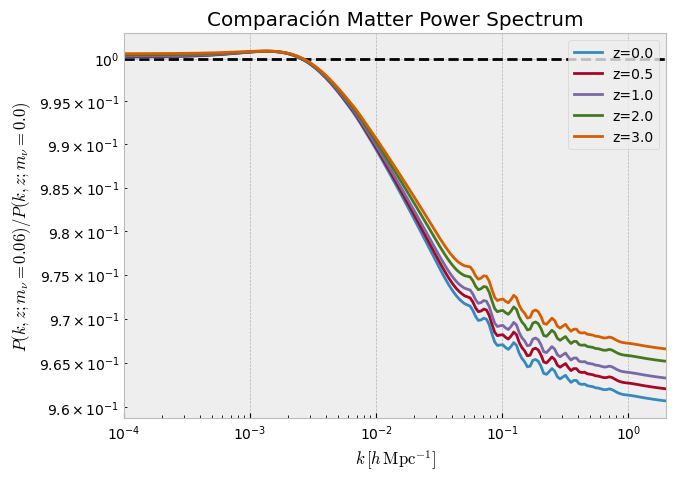

In [5]:
plt.figure(figsize=(7,5))

plt.hlines(1, kh[0], kh[-1], colors='black', linestyles='dashed')
for i, redshift in enumerate(z):
    plt.loglog(kh, pk[i]/pk0[i], label=f'z={redshift}')
plt.xlim(kh[0], kh[-1])   
    
plt.title('Comparación Matter Power Spectrum')
plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
plt.ylabel(r'$P(k,z; m_{\nu}=0.06)/P(k,z; m_{\nu}=0.0)$')
plt.legend()
plt.grid(True)
plt.show()

La presencia de neutrinos masivos afecta al **Power Matter Spectrum** (**PMS**)  

A escalas grandes ($k$ pequeño) no hay una diferencia notable del **PMS** entre el modelo con neutones 

**b)**  Using CAMB compute the TT angular power spectrum. Then, explore different cosmological parameters and explain the differences in the results. Give at least one compelling example and its justification.

- Escribimos un código que calcule el **TT angular power spectrum** para una cosmología "estándar"

----- Cosmological Parameters -----
H0 = 67.5
ombh2 = 0.022
omch2 = 0.122
mnu = 0.06
omk = 0
tau = 0.06
As = 2e-09
ns = 0.965


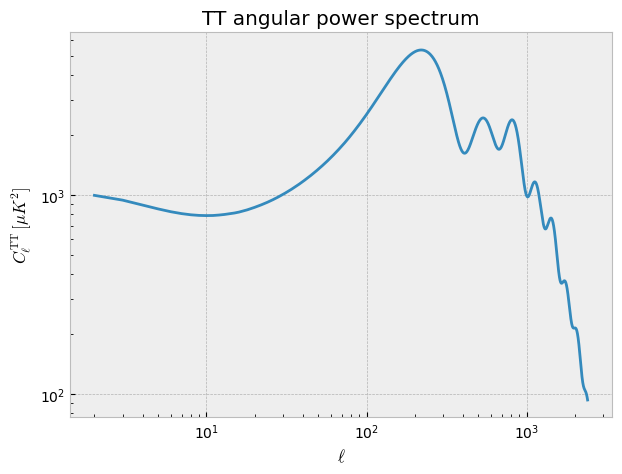

In [6]:
# Configuración de parámetros
# Parámetros actuales del universo
cosmo_params = {
    'H0': 67.5,        # Constante de Hubble [km/s/Mpc]
    'ombh2': 0.022,    # densidad de bariones
    'omch2': 0.122,    # densidad de CDM
    'mnu': 0.06,       # suma de masas de neutrinos [eV]
    'omk': 0,          # curvatura (universo plano)
    'tau': 0.06,       # reionización
    'As': 2e-9,        # comoving Curvature Power / fiducial amplitude guess
    'ns': 0.965        # índice espectral escalar
}

pars = camb.set_params(**cosmo_params)
print('----- Cosmological Parameters -----')
for key, val in cosmo_params.items():
    print(f'{key} = {val}')
    
# Primordial Power Spectrum    
pars.InitPower.set_params()

results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

ell = arange(powers['total'].shape[0])  # Multipolos l 
TT = powers['total'][:,0]               # Temp. - Temp.
EE = powers['total'][:,1]               # E-mode polarization
BB = powers['total'][:,2]               # B-mode polarization
TE = powers['total'][:,3]               # Temp. - E-mode


plt.figure(figsize=(7,5))
plt.loglog(ell[2:], TT[2:])
  
plt.title('TT angular power spectrum')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.grid(True)
plt.show()

- A partir del código anterior definimos una función que automáticamente calcule y grafique el **TT** vs $\ell$. Los parámetros por defecto son los de la cosmología "estándar" previamente definida 

In [7]:
def plot_TT(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0., tau = 0.06, As=2e-9, ns=0.965, label=None):
    pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, mnu=mnu, omk=omk, tau=tau, As=As, ns=ns) 
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    TT = powers['total'][:,0] # TT
    ell = arange(len(TT))     # Multipolos l 
    
    plt.loglog(ell[2:], TT[2:], label=label)

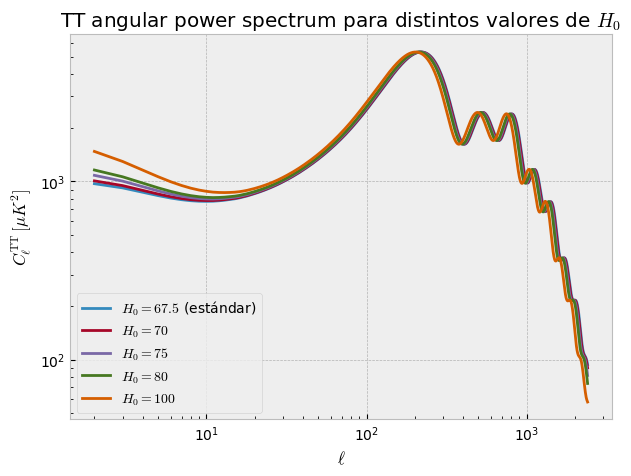

In [8]:
plt.figure(figsize=(7,5))

plot_TT(H0=67.5, label=r'$H_{0}=67.5$ (estándar)')
plot_TT(H0=70, label=r'$H_{0}=70$')
plot_TT(H0=75, label=r'$H_{0}=75$')
plot_TT(H0=80, label=r'$H_{0}=80$')
plot_TT(H0=100, label=r'$H_{0}=100$')

plt.title('TT angular power spectrum para distintos valores de $H_{0}$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()

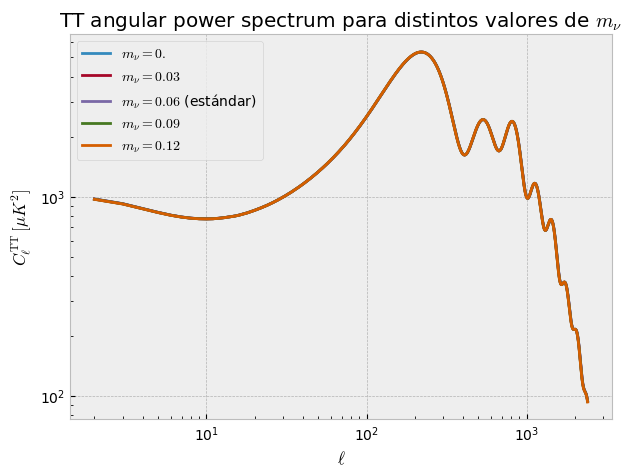

In [9]:
plt.figure(figsize=(7,5))

plot_TT(mnu=0., label=r'$m_{\nu}=0.$')
plot_TT(mnu=0.03, label=r'$m_{\nu}=0.03$')
plot_TT(mnu=0.06, label=r'$m_{\nu}=0.06$ (estándar)')
plot_TT(mnu=0.09, label=r'$m_{\nu}=0.09$')
plot_TT(mnu=0.12, label=r'$m_{\nu}=0.12$')

plt.title(r'TT angular power spectrum para distintos valores de $m_{\nu}$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()

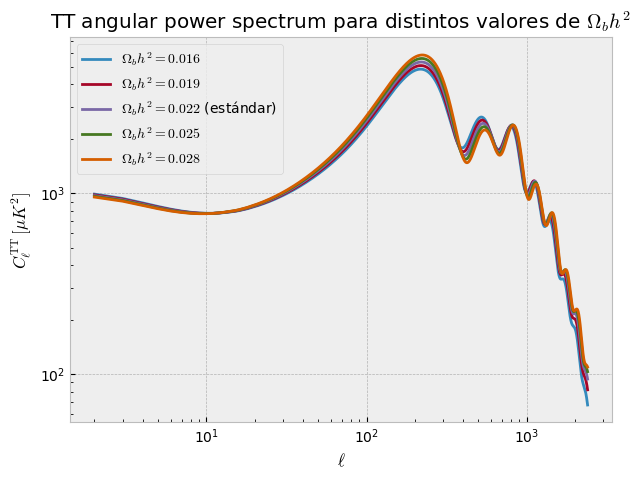

In [10]:
plt.figure(figsize=(7,5))

plot_TT(ombh2=0.016, label=r'$\Omega_{b}h^2=0.016$')
plot_TT(ombh2=0.019, label=r'$\Omega_{b}h^2=0.019$')
plot_TT(ombh2=0.022, label=r'$\Omega_{b}h^2=0.022$ (estándar)')
plot_TT(ombh2=0.025, label=r'$\Omega_{b}h^2=0.025$')
plot_TT(ombh2=0.028, label=r'$\Omega_{b}h^2=0.028$')

plt.title(r'TT angular power spectrum para distintos valores de $\Omega_{b}h^2$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()

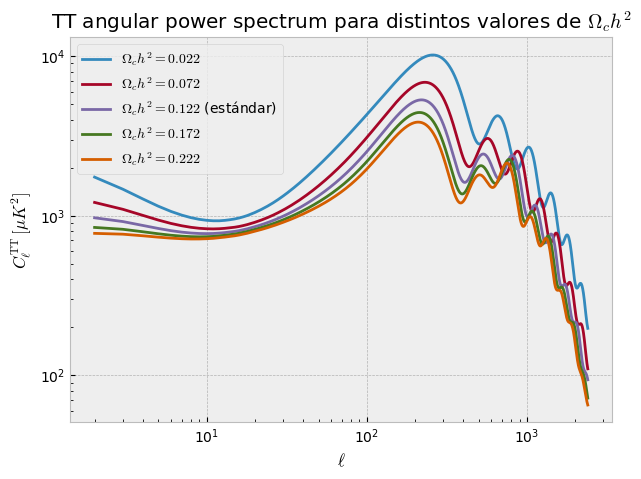

In [11]:
plt.figure(figsize=(7,5))

plot_TT(omch2=0.022, label=r'$\Omega_{c}h^2=0.022$')
plot_TT(omch2=0.072, label=r'$\Omega_{c}h^2=0.072$')
plot_TT(omch2=0.122, label=r'$\Omega_{c}h^2=0.122$ (estándar)')
plot_TT(omch2=0.172, label=r'$\Omega_{c}h^2=0.172$')
plot_TT(omch2=0.222, label=r'$\Omega_{c}h^2=0.222$')

plt.title(r'TT angular power spectrum para distintos valores de $\Omega_{c}h^2$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()

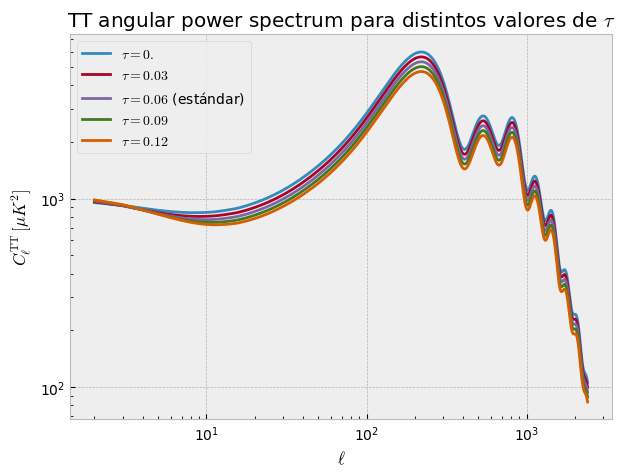

In [12]:
plt.figure(figsize=(7,5))

plot_TT(tau=0., label=r'$\tau=0.$')
plot_TT(tau=0.03, label=r'$\tau=0.03$')
plot_TT(tau=0.06, label=r'$\tau=0.06$ (estándar)')
plot_TT(tau=0.09, label=r'$\tau=0.09$')
plot_TT(tau=0.12, label=r'$\tau=0.12$')

plt.title(r'TT angular power spectrum para distintos valores de $\tau$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()

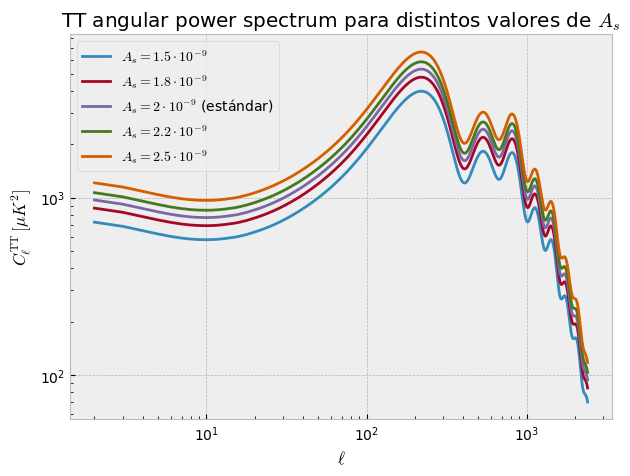

In [13]:
plt.figure(figsize=(7,5))

plot_TT(As=1.5e-9, label=r'$A_{s}=1.5\cdot10^{-9}$')
plot_TT(As=1.8e-9, label=r'$A_{s}=1.8\cdot10^{-9}$')
plot_TT(As=2e-9, label=r'$A_{s}=2\cdot10^{-9}$ (estándar)')
plot_TT(As=2.2e-9, label=r'$A_{s}=2.2\cdot10^{-9}$')
plot_TT(As=2.5e-9, label=r'$A_{s}=2.5\cdot10^{-9}$')

plt.title(r'TT angular power spectrum para distintos valores de $A_{s}$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()

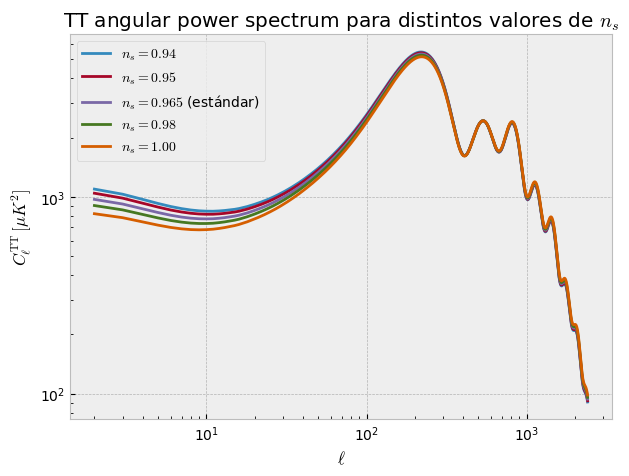

In [14]:
plt.figure(figsize=(7,5))

plot_TT(ns=0.94, label=r'$n_{s}=0.94$')
plot_TT(ns=0.95, label=r'$n_{s}=0.95$')
plot_TT(ns=0.965, label=r'$n_{s}=0.965$ (estándar)')
plot_TT(ns=0.98, label=r'$n_{s}=0.98$')
plot_TT(ns=1., label=r'$n_{s}=1.00$')

plt.title(r'TT angular power spectrum para distintos valores de $n_{s}$')    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\rm TT}\, [\mu K^2]$')
plt.legend()
plt.grid(True)
plt.show()